# IMDb Review Sentiment Classifier

## Load and Explore data

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
import numpy as np

# Load the dataset (only keep the top 10,000 most frequent words)
vocab_size = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

# View dataset shape
print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")

# Preview a sample review (as integers)
print("\nSample review (encoded):", X_train[0])
print("Sentiment label:", y_train[0])  # 1 = positive, 0 = negative


2025-03-23 19:27:33.685822: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Training samples: 25000
Test samples: 25000

Sample review (encoded): [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19,

## Preprocess the text data

In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Set max review length
max_len = 256

# Pad sequences (shorter reviews will be padded, longer will be truncated)
X_train_padded = pad_sequences(X_train, maxlen=max_len, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test, maxlen=max_len, padding='post', truncating='post')

# Confirm shape
print(f"Padded Training Data Shape: {X_train_padded.shape}")
print(f"Padded Test Data Shape: {X_test_padded.shape}")


Padded Training Data Shape: (25000, 256)
Padded Test Data Shape: (25000, 256)


## Build and Train LSTM Deep Learning model

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Define model
model = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=256),
    LSTM(64, return_sequences=False),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train_padded, y_train,
                    epochs=5,
                    batch_size=128,
                    validation_split=0.2)


2025-03-23 19:27:42.848911: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/5
157/157 [==============================] - 30s 181ms/step - loss: 0.6936 - accuracy: 0.5015 - val_loss: 0.6930 - val_accuracy: 0.4976
Epoch 2/5
157/157 [==============================] - 28s 179ms/step - loss: 0.6897 - accuracy: 0.5247 - val_loss: 0.6820 - val_accuracy: 0.5442
Epoch 3/5
157/157 [==============================] - 26s 168ms/step - loss: 0.6383 - accuracy: 0.6472 - val_loss: 0.7130 - val_accuracy: 0.5216
Epoch 4/5
157/157 [==============================] - 28s 177ms/step - loss: 0.6155 - accuracy: 0.6399 - val_loss: 0.5244 - val_accuracy: 0.7888
Epoch 5/5
157/157 [==============================] - 27s 172ms/step - loss: 0.5198 - accuracy: 0.7867 - val_loss: 0.6376 - val_accuracy: 0.6916


## Evaluate the model on test set

In [4]:
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test_padded, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

782/782 [==============================] - 15s 20ms/step - loss: 0.6328 - accuracy: 0.6935
Test Accuracy: 0.6935


## Plot Accuracy and Loss Over Epochs

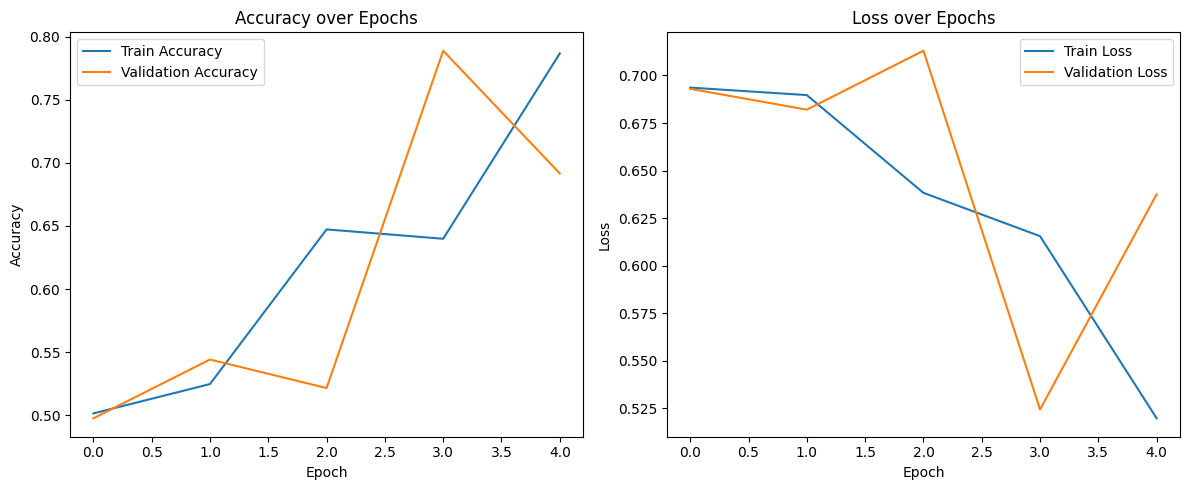

In [5]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

## Evaluate Performance with Confusion Matrix

782/782 [==============================] - 14s 18ms/step


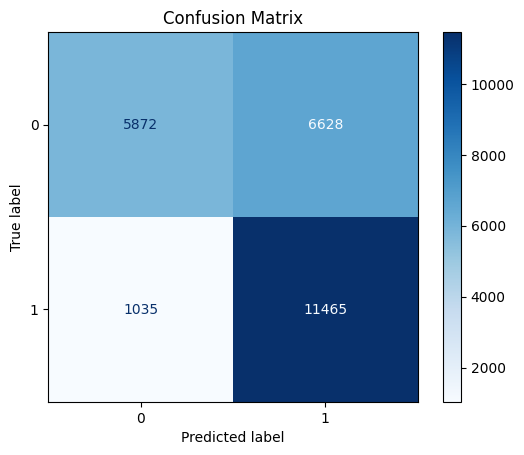

              precision    recall  f1-score   support

           0       0.85      0.47      0.61     12500
           1       0.63      0.92      0.75     12500

    accuracy                           0.69     25000
   macro avg       0.74      0.69      0.68     25000
weighted avg       0.74      0.69      0.68     25000



In [6]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Predict labels
y_pred = (model.predict(X_test_padded) > 0.5).astype("int32")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

## Logistic Regression with TF-IDF


### Preproces the text using decode_review funtion

In [7]:
# Load the word index
word_index = imdb.get_word_index()
index_word = {index + 3: word for word, index in word_index.items()}
index_word[0] = "<PAD>"
index_word[1] = "<START>"
index_word[2] = "<UNK>"
index_word[3] = "<UNUSED>"

# Function to decode reviews
def decode_review(encoded_review):
    return ' '.join([index_word.get(i, '?') for i in encoded_review])

In [8]:
# Decode reviews to text
X_train_text = [decode_review(review) for review in X_train]
X_test_text = [decode_review(review) for review in X_test]

### Vectorize with TF-IDF

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=10000)

# Fit and transform
X_train_tfidf = vectorizer.fit_transform(X_train_text)
X_test_tfidf = vectorizer.transform(X_test_text)

### Train Logistic Regression Model

              precision    recall  f1-score   support

           0       0.89      0.88      0.88     12500
           1       0.88      0.89      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



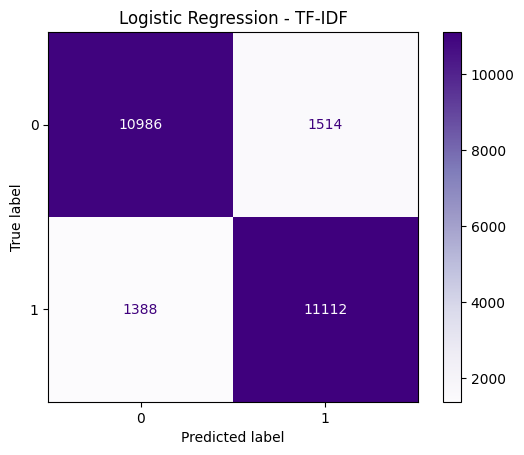

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Train model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred_lr = lr_model.predict(X_test_tfidf)

# Classification report
print(classification_report(y_test, y_pred_lr))

# Confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp.plot(cmap="Purples")
plt.title("Logistic Regression - TF-IDF")
plt.show()

## Random Forest Classifier with TF-IDF

Classification Report - Random Forest
              precision    recall  f1-score   support

           0       0.83      0.86      0.84     12500
           1       0.85      0.82      0.84     12500

    accuracy                           0.84     25000
   macro avg       0.84      0.84      0.84     25000
weighted avg       0.84      0.84      0.84     25000



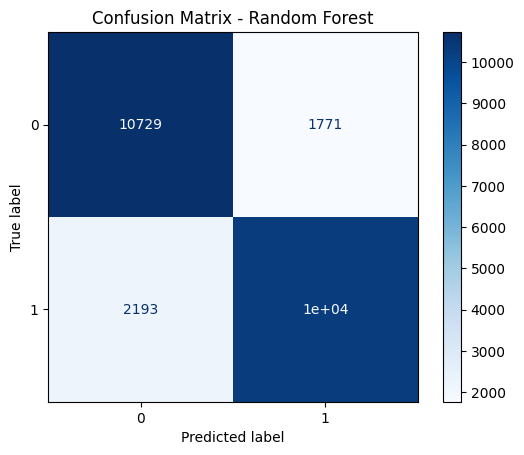

In [11]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test_tfidf)

# Evaluate performance
print("Classification Report - Random Forest")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.show()


## XGBoost Classifier with TF-IDF

Classification Report - XGBoost
              precision    recall  f1-score   support

           0       0.87      0.84      0.85     12500
           1       0.85      0.87      0.86     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000



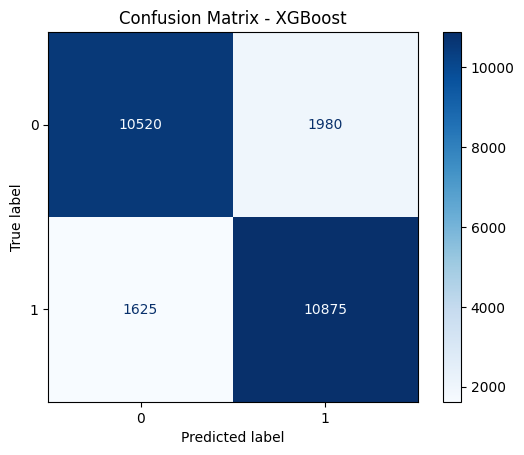

In [12]:
from xgboost import XGBClassifier

# Initialize and train XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_tfidf, y_train)

# Predict on test set
y_pred_xgb = xgb_model.predict(X_test_tfidf)

# Evaluate performance
print("Classification Report - XGBoost")
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb)
disp_xgb.plot(cmap="Blues")
plt.title("Confusion Matrix - XGBoost")
plt.show()

## Basic Neural Network with TF-IDF

In [13]:
from tensorflow.keras.optimizers import Adam

# Define the model
bn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_tfidf.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
bn_model.compile(optimizer=Adam(learning_rate=0.001), 
                 loss='binary_crossentropy', 
                 metrics=['accuracy'])

# Train the model
history_bn = bn_model.fit(
    X_train_tfidf.toarray(), y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.2,
    verbose=1
)

# Evaluate the model
test_loss, test_accuracy = bn_model.evaluate(X_test_tfidf.toarray(), y_test)
print(f"Neural Network Test Accuracy: {test_accuracy:.4f}")

Epoch 1/5
157/157 [==============================] - 3s 15ms/step - loss: 0.3956 - accuracy: 0.8377 - val_loss: 0.2617 - val_accuracy: 0.8930
Epoch 2/5
157/157 [==============================] - 2s 12ms/step - loss: 0.1858 - accuracy: 0.9306 - val_loss: 0.2794 - val_accuracy: 0.8890
Epoch 3/5
157/157 [==============================] - 2s 12ms/step - loss: 0.1181 - accuracy: 0.9581 - val_loss: 0.3202 - val_accuracy: 0.8846
Epoch 4/5
157/157 [==============================] - 2s 13ms/step - loss: 0.0679 - accuracy: 0.9797 - val_loss: 0.3852 - val_accuracy: 0.8786
Epoch 5/5
782/782 [==============================] - 2s 2ms/step - loss: 0.5323 - accuracy: 0.8546
Neural Network Test Accuracy: 0.8546


782/782 [==============================] - 2s 2ms/step
Classification Report - Basic Neural Network
              precision    recall  f1-score   support

           0       0.85      0.86      0.86     12500
           1       0.86      0.85      0.85     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000



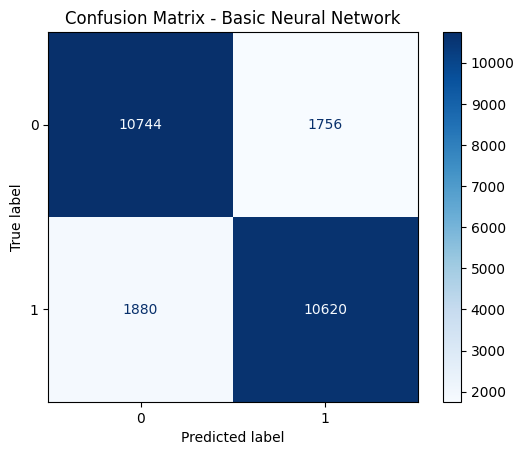

In [14]:
# Predict on test data
y_pred_bn = (bn_model.predict(X_test_tfidf.toarray()) > 0.5).astype("int32")

# Classification Report
print("Classification Report - Basic Neural Network")
print(classification_report(y_test, y_pred_bn))

# Confusion Matrix
cm_bn = confusion_matrix(y_test, y_pred_bn)
disp_bn = ConfusionMatrixDisplay(confusion_matrix=cm_bn)
disp_bn.plot(cmap="Blues")
plt.title("Confusion Matrix - Basic Neural Network")
plt.show()